In [1]:
# Imports
from SimulationArgon import Simulation
import subprocess
import numpy as np
import pandas as pd
from openmm import unit
import matplotlib.pyplot as plt

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************


In [2]:
# Simulation Parameters
######################
Temperature = 350           # Temperature of the System (Kelvin)
Steps = 3000                # Number of Steps/Frames to render in the Simulation (Unitless) (Integer)
SkipSteps = 5               # Number of Steps to skip initially (Integer/Unitless)
EquilSteps = 120            # Number of Steps (Integer/Unitless)
N=200                       # Number of Argon-Argon Molecules (Integer/Unitless)
######################

Simulation beginning...


,Number of Particles,Simulation Steps,Average Energy (kJ/mol) (Total),Energy Variance (kJ/mol) (Total),Average Energy (kJ/mol) (Per Particle),Standard Error Bars,Number of Neighbors
0,200,3000,-847.1896,1331.4022,-4.235948,0.666184,12.13623


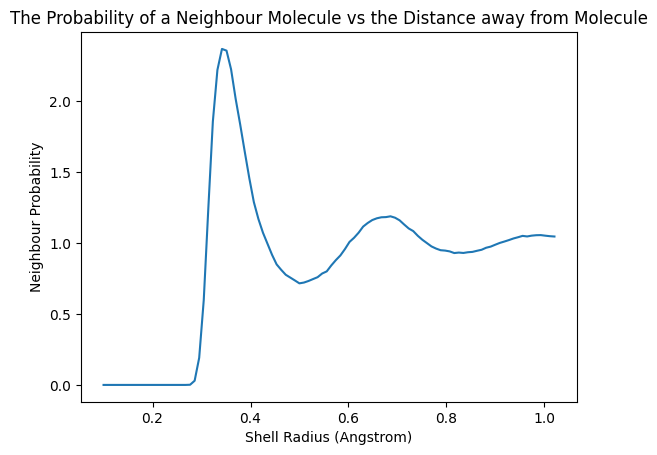

In [3]:
# Single Simulation with Average
def GetAVGAndVAR (Temperature, Steps, SkipSteps, EquilSteps, N, printOutput = False):
    # Run the Simulation
    Simulation(Temperature, Steps, SkipSteps, EquilSteps, N, printOutput)

    # Run a Subprocess to Simulate a CLI Interaction (Command Line) and Automatically Run and Extract info from Vanalysis.py and genPairDistancesArgon.py
    VAnalysisResult = subprocess.run(f"python Vanalysis.py ar_liquid_traj{N}.h5", shell=True, text=True, capture_output=True)
    genPairDistanceResult = subprocess.run(f"python genPairDistancesArgon.py ar_liquid_traj{N}.h5", shell=True, text=True, capture_output=True)

    # Extract the Lines
    VAnalysisLines =  VAnalysisResult.stdout.split("\n")
    genPairLines = genPairDistanceResult.stdout.split("\n")
    
    # Extract genPairDistance Info
    Neighbours = float(genPairLines[3].split("=")[1].strip())

    # Extract Average and Variance
    AVG = float(VAnalysisLines[0].split("=")[1].strip())
    VAR = float(VAnalysisLines[1].split("=")[1].strip())
    
    # Return the Number of Particles and the Average and Variance
    return [N, Steps, AVG, VAR, AVG/N, np.sqrt(VAR)/np.sqrt(Steps), Neighbours]

[PartNum,SimSteps, Avg, Var, AvgPerPart, StdErr, Neighbours] = GetAVGAndVAR(Temperature, Steps, SkipSteps, EquilSteps, N, False)

df = pd.DataFrame({
    "Number of Particles" : [PartNum],
    "Simulation Steps" : [SimSteps],
    "Average Energy (kJ/mol) (Total)" : [Avg],
    "Energy Variance (kJ/mol) (Total)" : [Var],
    "Average Energy (kJ/mol) (Per Particle)" : [AvgPerPart],
    "Standard Error Bars" : [StdErr],
    "Number of Neighbors" : [Neighbours]
})

display(df)

Gr = pd.read_csv(f"Ar_histo_{N}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    
plt.figure()
plt.plot(Gr[Gr.columns[0]], Gr[Gr.columns[1]], "-")
plt.title("The Probability of a Neighbour Molecule vs the Distance away from Molecule")
plt.xlabel("Shell Radius (Angstrom)")
plt.ylabel("Neighbour Probability")
plt.savefig("GR_Prob.png")
plt.show()

Start : 200
Simulation beginning...
Start : 400
Simulation beginning...
Start : 600
Simulation beginning...
Start : 800
Simulation beginning...
Start : 1000
Simulation beginning...
Start : 1200
Simulation beginning...


,Number of Particles,Simulation Steps,Average Energy (kJ/mol) (Total),Energy Variance (kJ/mol) (Total),Average Energy (kJ/mol) (Per Particle),Standard Error Bars,Number of Neighbors
0,200,3000,-844.1590,1454.1683,-4.220795,0.696220,12.153187
1,400,3000,-1713.2893,3789.7136,-4.283223,1.123939,12.060933
2,600,3000,-2558.3853,5994.9690,-4.263975,1.413621,11.772137
3,800,3000,-3420.2427,8490.5530,-4.275303,1.682315,12.436821
4,1000,3000,-4204.4080,14143.4120,-4.204408,2.171283,12.485608
5,1200,3000,-5129.3460,19867.4700,-4.274455,2.573420,12.069097


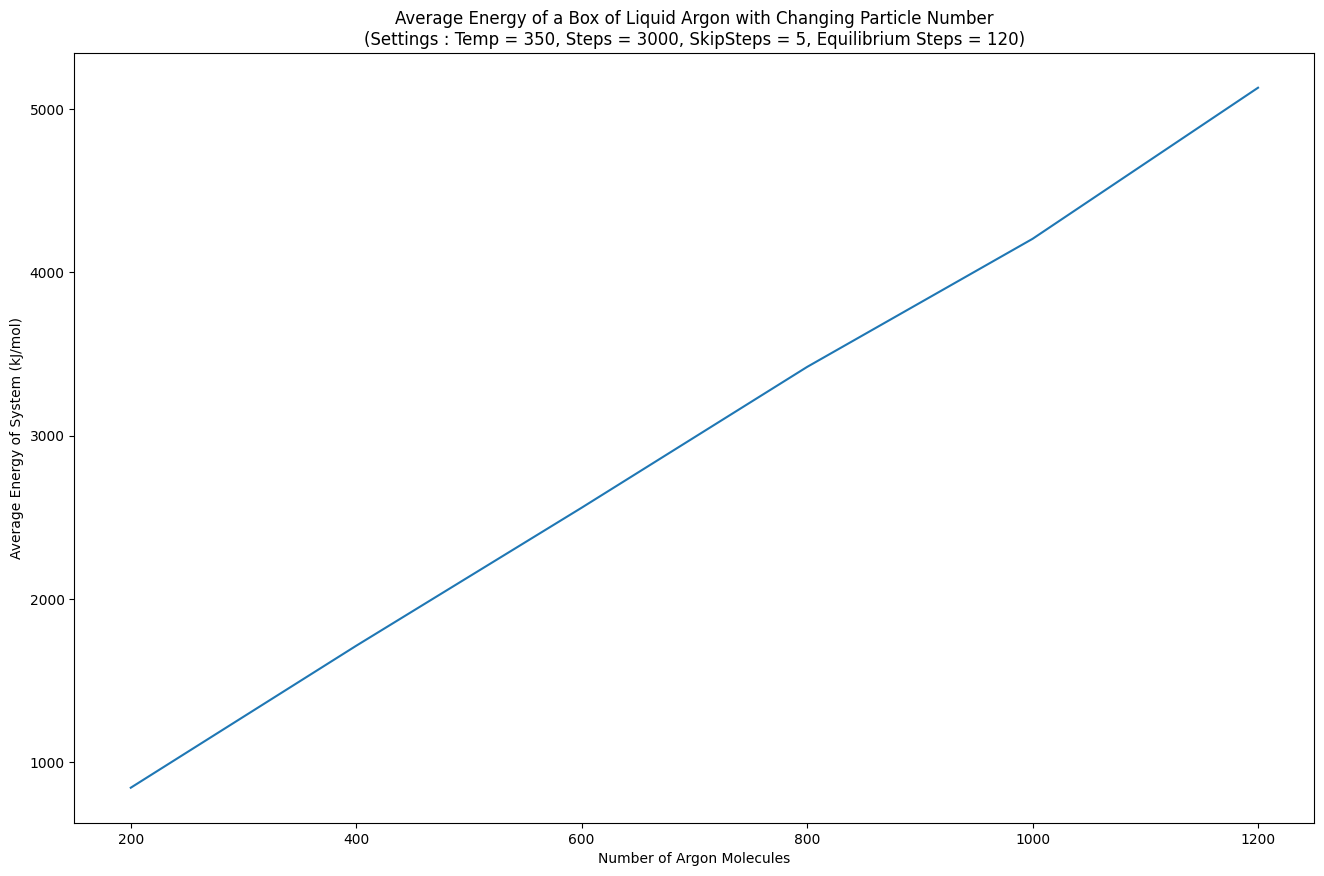

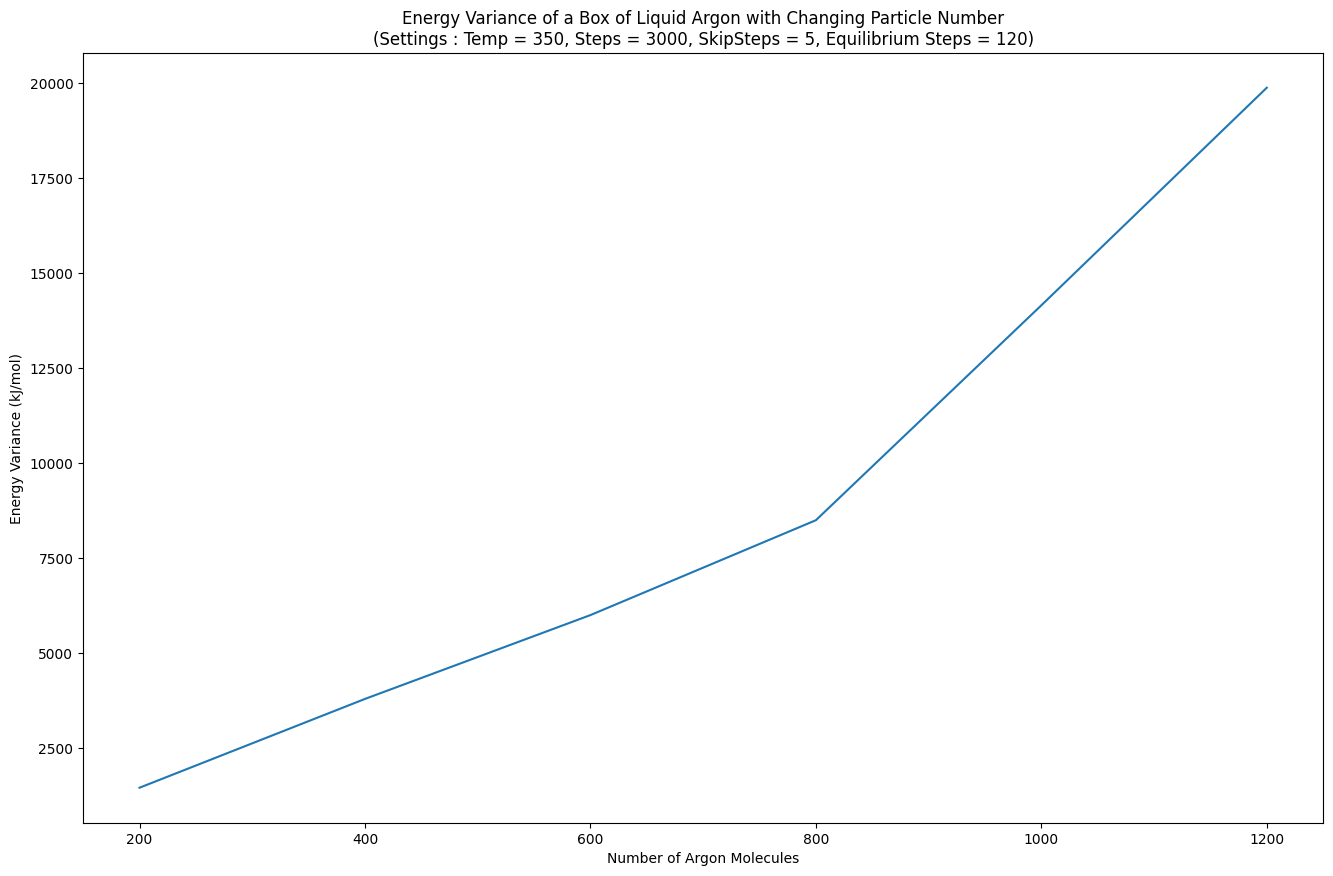

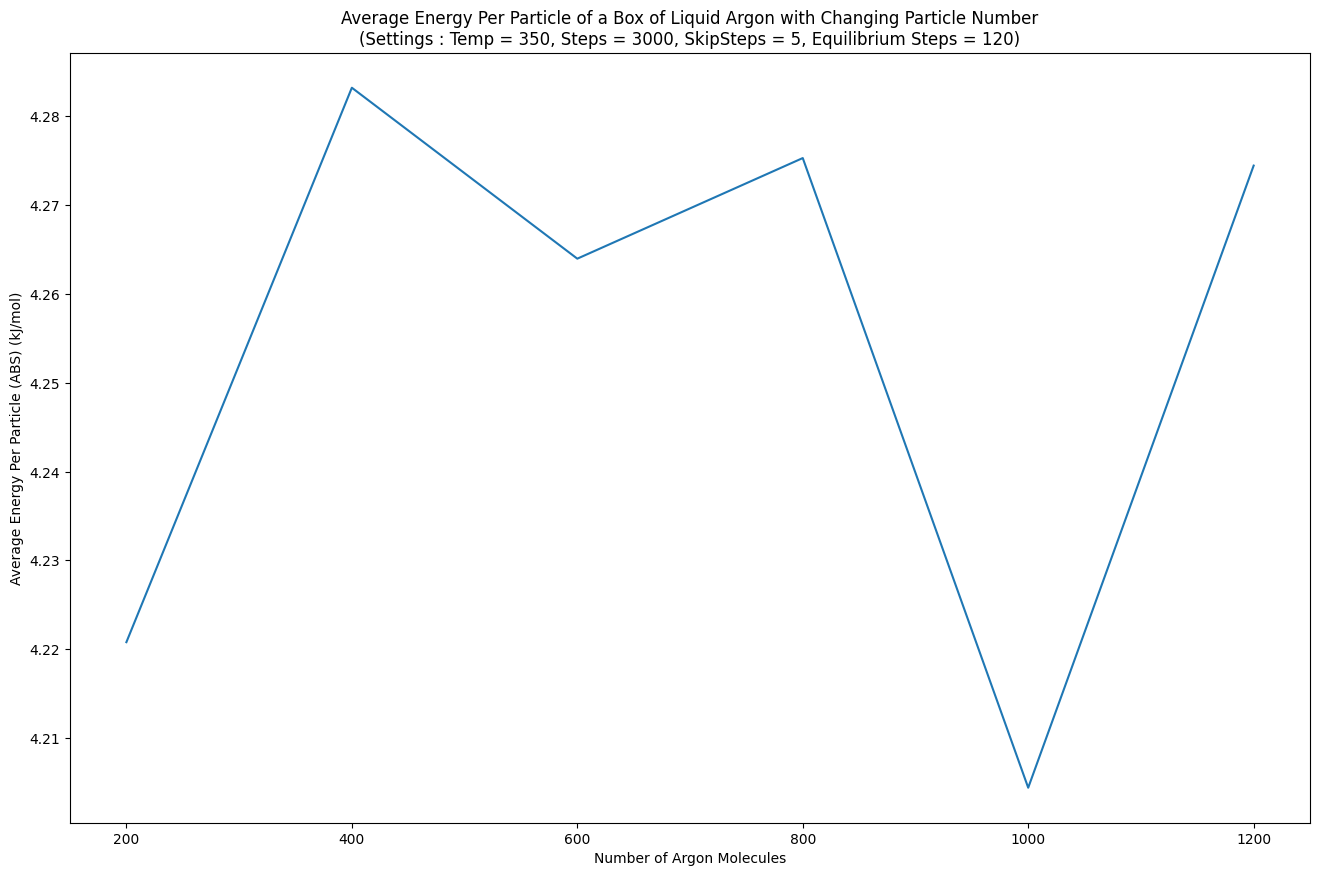

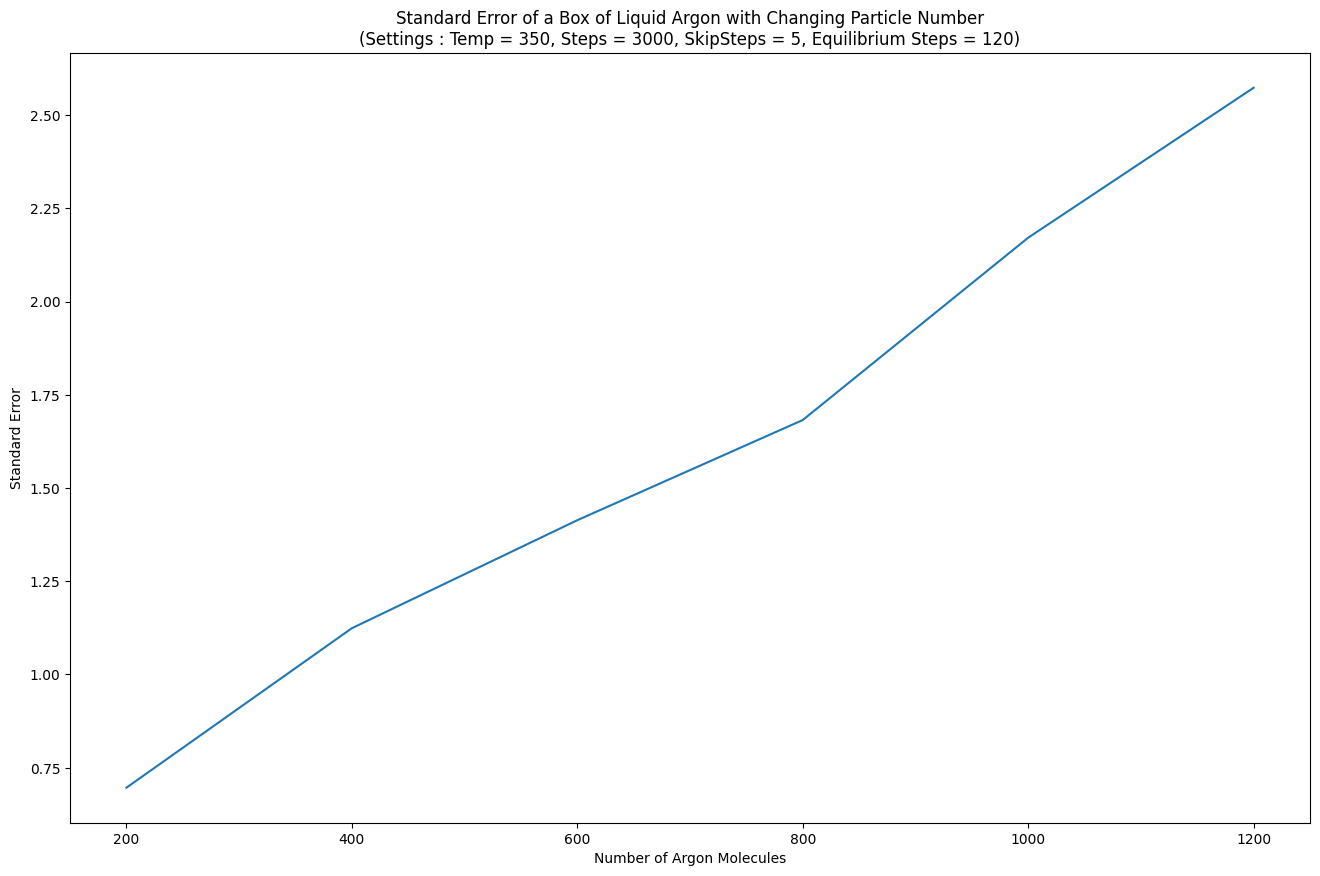

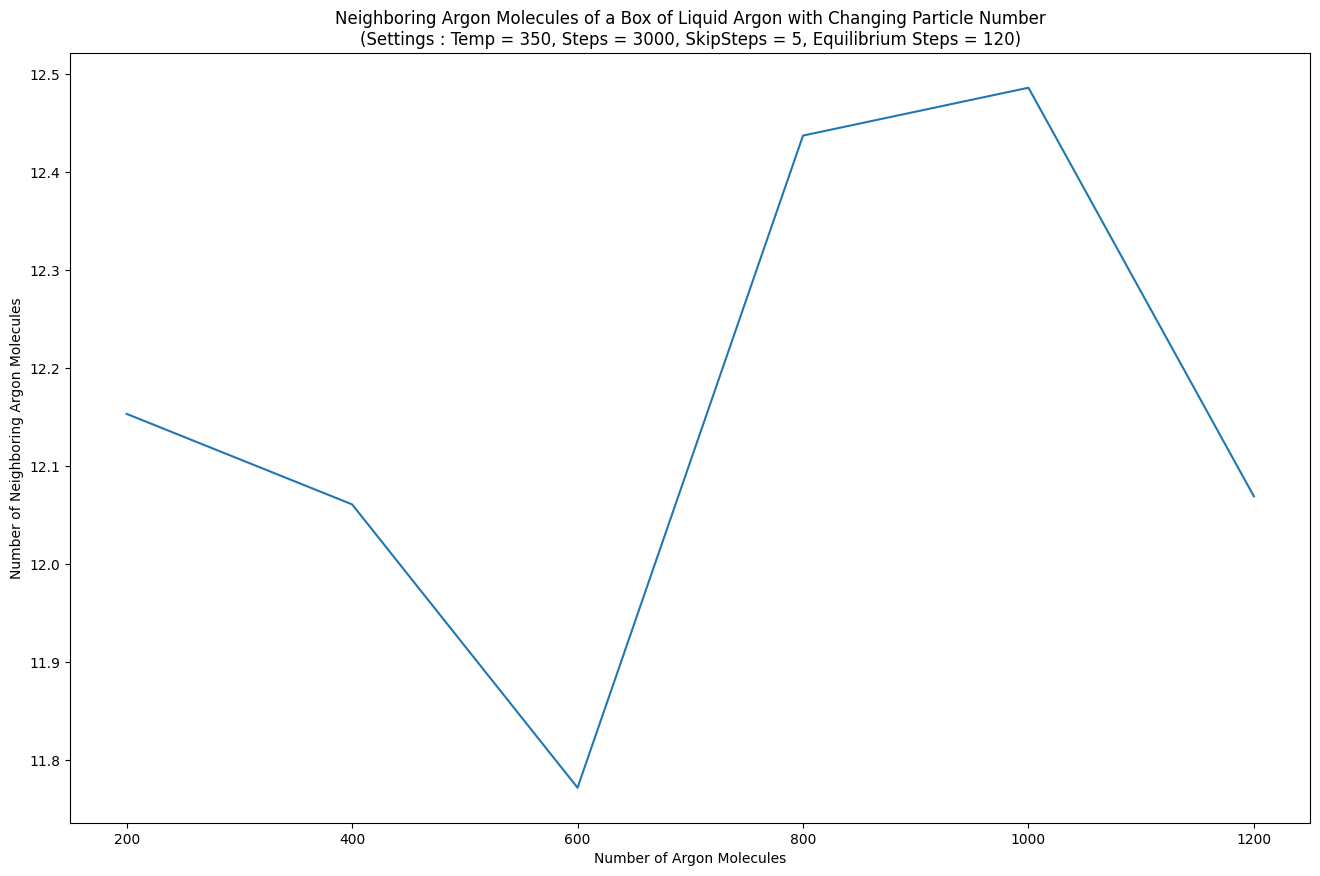

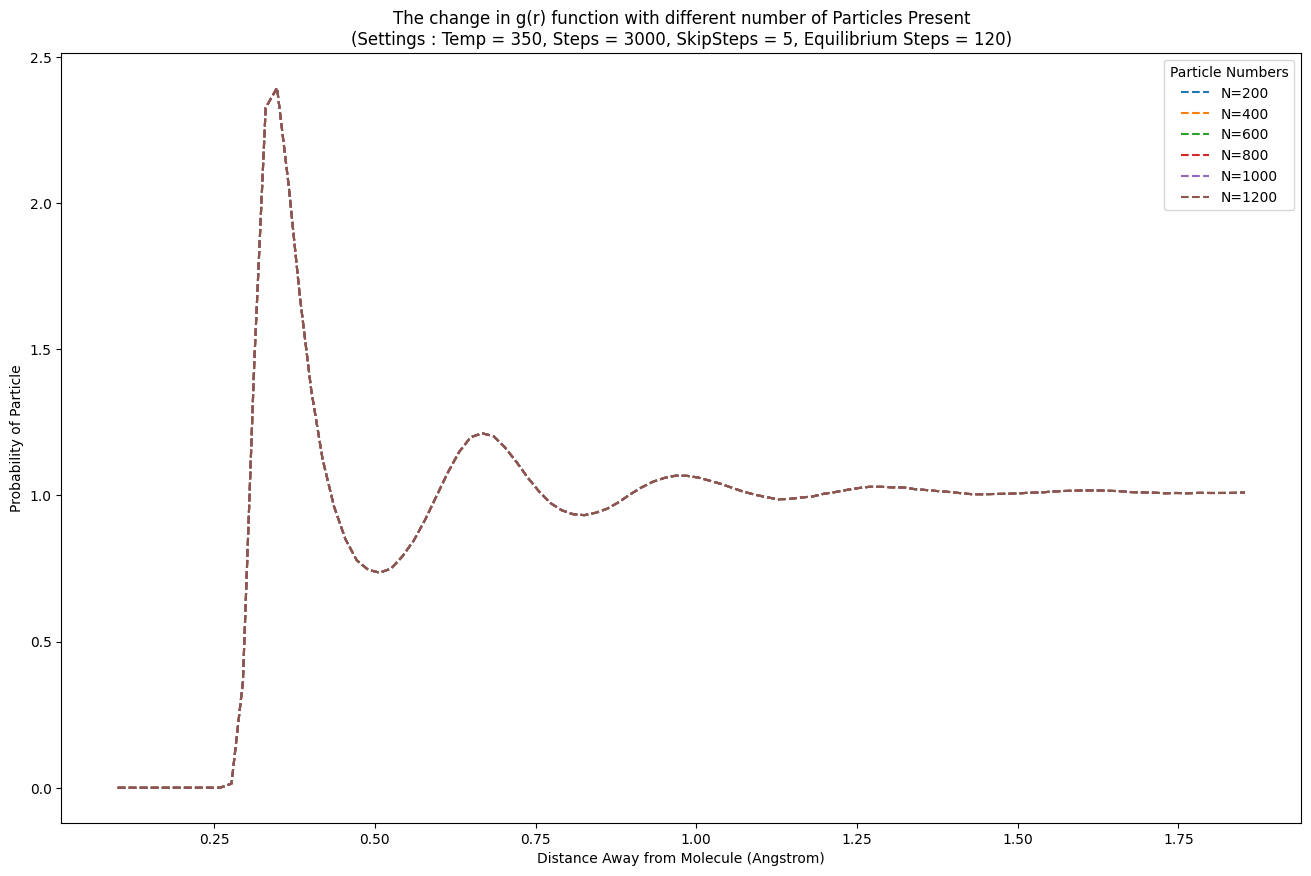

In [4]:
# Plotting the Difference

# Define the Column headers for Dataframe
columnHeaders = ["Number of Particles", "Simulation Steps", "Average Energy (kJ/mol) (Total)", "Energy Variance (kJ/mol) (Total)", "Average Energy (kJ/mol) (Per Particle)", "Standard Error Bars", "Number of Neighbors"]

# Store Results in the following
results = []

# Empty Array
NVals = []

# Fill with Test Values
for i in range(6):
    NVals.append(200 + 200*i)
    
# Loop through Muliple Simulations with different Particle Number
for N in NVals:
    print(f"Start : {N}")
    results.append(GetAVGAndVAR(Temperature, Steps, SkipSteps, EquilSteps, N))
    
# Create the DataFrame
mods = pd.DataFrame(results, columns=columnHeaders)

# Display the DataFrame
display(mods)

# Plot the Change in Average Energy Total
plt.figure(figsize=(16, 10))
plt.plot(mods[columnHeaders[0]], np.abs(mods[columnHeaders[2]]), "-")
plt.xlabel("Number of Argon Molecules")
plt.ylabel("Average Energy of System (kJ/mol)")
plt.title(f"Average Energy of a Box of Liquid Argon with Changing Particle Number\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("AVG_Total_Energy.png")
plt.show()

# Plot the Change in Energy Variance Total
plt.figure(figsize=(16, 10))
plt.plot(mods[columnHeaders[0]], mods[columnHeaders[3]], "-")
plt.xlabel("Number of Argon Molecules")
plt.ylabel("Energy Variance (kJ/mol)")
plt.title(f"Energy Variance of a Box of Liquid Argon with Changing Particle Number\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("Var_Total_Energy.png")
plt.show()

# Plot the Change in Average Energy (Per Particle)
plt.figure(figsize=(16, 10))
plt.plot(mods[columnHeaders[0]], np.abs(mods[columnHeaders[4]]), "-")
plt.xlabel("Number of Argon Molecules")
plt.ylabel("Average Energy Per Particle (ABS) (kJ/mol)")
plt.title(f"Average Energy Per Particle of a Box of Liquid Argon with Changing Particle Number\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("AVG_Particle_Energy.png")
plt.show()

# Plot the Change in Standard Error
plt.figure(figsize=(16, 10))
plt.plot(mods[columnHeaders[0]], mods[columnHeaders[5]], "-")
plt.xlabel("Number of Argon Molecules")
plt.ylabel("Standard Error")
plt.title(f"Standard Error of a Box of Liquid Argon with Changing Particle Number\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("STD_Error.png")
plt.show()

# Plot the Change in Neighbors
plt.figure(figsize=(16, 10))
plt.plot(mods[columnHeaders[0]], mods[columnHeaders[6]], "-")
plt.xlabel("Number of Argon Molecules")
plt.ylabel("Number of Neighboring Argon Molecules")
plt.title(f"Neighboring Argon Molecules of a Box of Liquid Argon with Changing Particle Number\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.savefig("Neighbor_Change.png")
plt.show()

# Plot Change in g(r) Function
plt.figure(figsize=(16, 10))
for i in NVals:
    Gr = pd.read_csv(f"Ar_histo_{N}.txt", sep=' ', header=None, names=['Distance', 'Probability'])
    plt.plot(Gr[Gr.columns[0]], Gr[Gr.columns[1]], "--", label=f"N={i}")
    
plt.xlabel("Distance Away from Molecule (Angstrom)")
plt.ylabel("Probability of Particle")
plt.title(f"The change in g(r) function with different number of Particles Present\n(Settings : Temp = {Temperature}, Steps = {Steps}, SkipSteps = {SkipSteps}, Equilibrium Steps = {EquilSteps})")
plt.legend(title="Particle Numbers")
plt.savefig("Gr_Change.png")
plt.show()